# Ciencia de Datos
## 2º Cuatrimestre de 2017

## Módulo 6 - Procesamiento de Lenguaje Natural

## Integrantes:

- Fernández, Esteban - 691/12 - esteban.pmf@gmail.com
- Beccar García, Augusto - 267/13 - abg101@gmail.com
- Fadel, Uriel - 104/14 - urielfadel@gmail.com



## Librerias


In [84]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import collections
import math
from nltk.collocations import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import pandas as pd
import scipy
from gensim import corpora, models, similarities
from nltk.corpus import wordnet_ic
from nltk.corpus import wordnet


#nltk.download()

# Asociación de palabras:

### 1) Levantar Corpus AP

In [2]:
stopWords = set(stopwords.words('english'))

In [3]:
def get_doc_text_from(dirty_document):
    return dirty_document.split('</TEXT>')[0].split('<TEXT>')[1]

def tokenize_sentence(sentence):
    return [word_tokenize(lmtzr.lemmatize(word.translate(None, string.punctuation))) for word in sentence.lower().split() if word not in stopWords]

In [4]:
file = open('ap/ap.txt')
text = file.read()
splitFirst = text.split('</DOC>')[:-1]
docs_dict = {}

wordsCount = collections.Counter()

for index, document in enumerate(splitFirst):
    
    docText = get_doc_text_from(document)
    sentences_tokens = sent_tokenize(docText)
    list_sentences_words = list(map(lambda sent: tokenize_sentence(sent), sentences_tokens))
    docText = [item for sublist in list_sentences_words for item in sublist]
    docText = [item for sublist in docText for item in sublist]
    docName = document.split('</TEXT>')[0].split('<TEXT>')[0].split('</DOCNO>')[0].split('<DOCNO>')[1].strip()

    docs_dict[docName] = docText
    wordsCount = wordsCount + collections.Counter(docText)

### 2)  Calcular el tamaño del vocabulario

In [5]:
len(wordsCount.keys())

38012

### 3) Par más asociado según PMI, utilizando dos de las 500 palabras con más apariciones.

In [6]:
most_freq_words = list(reversed(sorted(list(wordsCount.items()), key=lambda x: x[1])[-500:]))
mfw = list(map(lambda x: x[0], most_freq_words))

In [7]:
## Bigrams
window_size = 10
bgm    = nltk.collocations.BigramAssocMeasures()
docText = [item for sublist in docs_dict.values() for item in sublist]
finder = nltk.collocations.BigramCollocationFinder.from_words(docText, window_size)
finder.apply_ngram_filter(lambda w1, w2: w1 not in mfw or w2 not in mfw)
scored = finder.score_ngrams(bgm.pmi)

#Ploteo más de una porque el bigrama "cent, cent" quizá no sea el más interesante
scored[:3]

[((u'cent', u'cent'), 7.298756215165483),
 (('prime', 'minister'), 6.690770798773226),
 (('iraq', 'kuwait'), 6.635304092820636)]

## Informacion Lexica 

### 1) Procesar tokenizando eliminando signos de puntuación

In [8]:
file = open('On_the_origin_of_species.txt')
text = file.read()
stopWordsWithoutFor = stopWords - {'for'}

tokenized_text = list(map(lambda sent:[word_tokenize(lmtzr.lemmatize(i.translate(None, string.punctuation))) for i in sent.lower().split() if i not in stopWordsWithoutFor], sent_tokenize(text)))
tokenized_text = [item for sublist in tokenized_text for item in sublist]
tokenized_text = [item for sublist in tokenized_text for item in sublist]


In [9]:
most_freq_words = list(reversed(sorted(list(collections.Counter(tokenized_text).items()), key=lambda x: x[1])[-500:]))
most_freq_words

[(u'specie', 1497),
 ('for', 1136),
 ('one', 649),
 ('may', 523),
 (u'variety', 507),
 ('case', 505),
 (u'form', 491),
 ('would', 488),
 ('many', 453),
 ('selection', 410),
 (u'plant', 400),
 ('natural', 382),
 (u'animal', 372),
 (u'genus', 352),
 ('two', 342),
 ('character', 321),
 (u'part', 320),
 ('period', 316),
 ('life', 309),
 ('several', 307),
 (u'fact', 290),
 ('number', 288),
 ('different', 282),
 (u'group', 282),
 ('see', 274),
 ('thus', 273),
 (u'condition', 272),
 ('nature', 261),
 ('great', 260),
 ('distinct', 257),
 ('new', 254),
 (u'structure', 248),
 ('must', 243),
 ('individual', 239),
 ('could', 234),
 ('much', 231),
 (u'difference', 229),
 ('time', 222),
 (u'organ', 220),
 ('degree', 219),
 ('of', 219),
 ('modification', 218),
 ('believe', 216),
 ('even', 212),
 ('instance', 207),
 ('long', 204),
 (u'island', 204),
 ('often', 200),
 ('generally', 199),
 ('yet', 199),
 ('first', 198),
 ('far', 195),
 ('common', 195),
 ('though', 193),
 ('breed', 192),
 ('view', 191),


### 2) Estimación de la autocorrelación para las palabras Plant, For e Instinct

#### Nota: por una cuestión de tiempo de ejecución se hacen saltos de a 10 palabras para calcular la densidad

In [37]:
words_to_analyse = {'plant', 'for' ,'instinct'}
#agregar for
word_x_listGaussiansIndexes = {}

for word in words_to_analyse:
    listGaussians = []
    for curr_word_index, curr_word in enumerate(tokenized_text):
        if word == curr_word:
            listGaussians.append(curr_word_index)
    word_x_listGaussiansIndexes[word] = listGaussians

word_x_Y_to_plot = {}

for word in words_to_analyse:
    Y = []
    for i in range(0, len(tokenized_text), 10):
        gaussians_sum_total_for_index = 0
        for gaussian_loc in word_x_listGaussiansIndexes[word]:
            gaussians_sum_total_for_index += norm.pdf(x=i, loc=gaussian_loc, scale=50) 
        Y.append(gaussians_sum_total_for_index)
    word_x_Y_to_plot[word] = Y

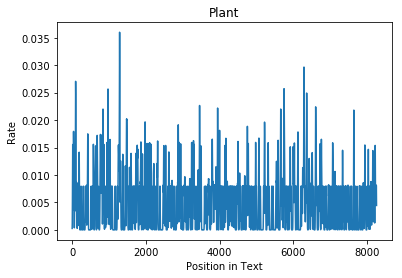

In [38]:
plt.plot(word_x_Y_to_plot['plant'])
plt.xlabel('Position in Text')
plt.ylabel('Rate')
plt.title('Plant')
plt.show()

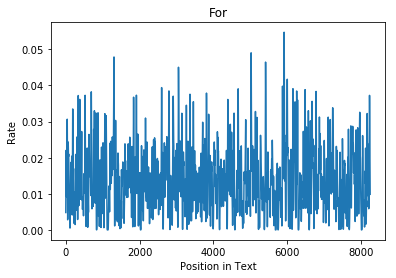

In [39]:
plt.plot(word_x_Y_to_plot['for'])
plt.xlabel('Position in Text')
plt.ylabel('Rate')
plt.title('For')
plt.show()

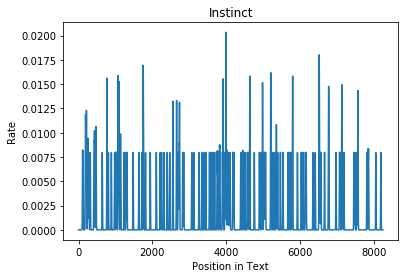

In [40]:
plt.plot(word_x_Y_to_plot['instinct'])
plt.xlabel('Position in Text')
plt.ylabel('Rate')
plt.title('Instinct')
plt.show()

In [41]:
def autocorrelation(gaussian_sums_by_index):
    pwt_avg = sum([ gaussian_sums_by_index[t] for t in range(len(gaussian_sums_by_index)) ]) / len(gaussian_sums_by_index)
    cociente = pwt_avg**2 + sum([ gaussian_sums_by_index[t]**2 for t in range(len(gaussian_sums_by_index)) ]) / len(gaussian_sums_by_index)

    taus = []

    for tau in range(1000):
        pwt_tau_avg = sum([ gaussian_sums_by_index[t]*gaussian_sums_by_index[t+tau] for t in range(0,len(gaussian_sums_by_index)-tau)]) / (len(gaussian_sums_by_index)-tau)
        taus.append(pwt_tau_avg - pwt_avg * (sum([gaussian_sums_by_index[t+tau] for t in range(0,len(gaussian_sums_by_index)-tau)]) / (len(gaussian_sums_by_index)-tau)))
        taus[tau] /= cociente
    return taus

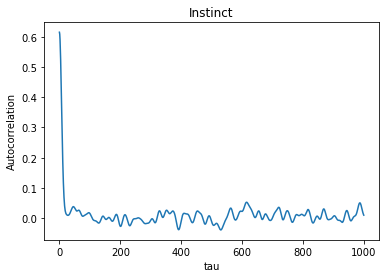

In [42]:
plt.plot(autocorrelation(word_x_Y_to_plot['instinct']))
plt.xlabel('tau')
plt.ylabel('Autocorrelation')
plt.title('Instinct')
plt.show()

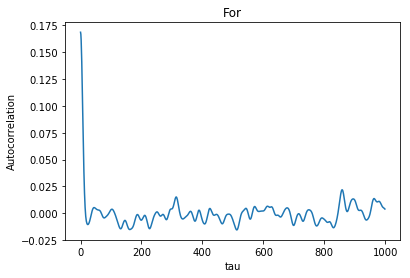

In [44]:
plt.plot(autocorrelation(word_x_Y_to_plot['for']))
plt.xlabel('tau')
plt.ylabel('Autocorrelation')
plt.title('For')
plt.show()

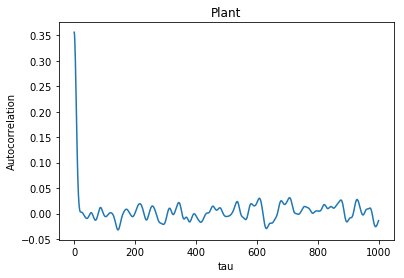

In [43]:
plt.plot(autocorrelation(word_x_Y_to_plot['plant']))
plt.xlabel('tau')
plt.ylabel('Autocorrelation')
plt.title('Plant')
plt.show()

### 3) Entropia de una selección de 100 palabras que abarcan el rango de frecuencia de apareción en el libro.

In [22]:
all_vocabulary_freq_sort_by_freq = list(reversed(sorted(list(collections.Counter(tokenized_text).items()), key=lambda x: x[1])))

word_of_each_frequency_bucket = []

###Por la distribucion no uniforme de las frecuencias seleccionamos las 100 palabras considerando una cuadratica divido 2.
for e in range(0,101):
    selection = all_vocabulary_freq_sort_by_freq[(e**2 / 2)]
    word_of_each_frequency_bucket.append(selection)

word_of_each_frequency_bucket = word_of_each_frequency_bucket[1:]

In [23]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [24]:
P = len(tokenized_text) / 64
all_word_ocurres=collections.Counter(tokenized_text)

partitionated_text = list(chunks(tokenized_text, P))
word_x_information_in_nonShuffled_partitionated_text = []

for word,n in word_of_each_frequency_bucket:
    entropy_word = 0
    for patition_text in partitionated_text:
        words_in_partition = collections.Counter(patition_text)
        n_j = words_in_partition[word]
        if n_j != 0:
            entropy_word += n_j/float(n) * math.log(n_j/float(n),2)
    word_x_information_in_nonShuffled_partitionated_text.append(-1 *entropy_word)


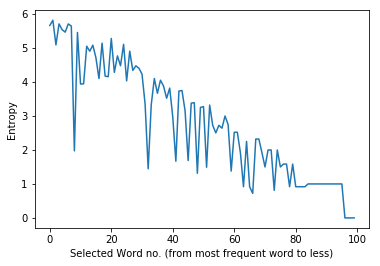

In [25]:
plt.plot(word_x_information_in_nonShuffled_partitionated_text)
plt.xlabel('Selected Word no. (from most frequent word to less)')
plt.ylabel('Entropy')
plt.show()

### 4) Calcular entropia randomizando la posición en el texto.

In [26]:
rand_text = random.shuffle(tokenized_text)
randomed_partitionated_text = list(chunks(tokenized_text, P)) 
word_x_information_in_Shuffled_partitionated_text = []

for word, n in word_of_each_frequency_bucket:
    entropy_word = 0
    for patition_text in randomed_partitionated_text:
        words_in_partition = collections.Counter(patition_text)
        n_j = words_in_partition[word]
        if n_j != 0:
            entropy_word += n_j/float(n) * math.log(n_j/float(n),2)
    word_x_information_in_Shuffled_partitionated_text.append(-1 *entropy_word)



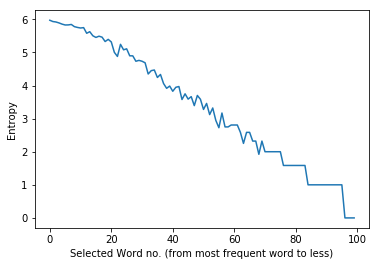

In [27]:
plt.plot(word_x_information_in_Shuffled_partitionated_text)
plt.xlabel('Selected Word no. (from most frequent word to less)')
plt.ylabel('Entropy')
plt.show()
plt.show()

#### Se puede ver que, al Shufflear el texto, la entropia de algunas palabras aumenta considerablemente, esto es porque se deja de tener en consideraion sus posiciones relativas en el texto original lo cual nos mostraba que algunas de ellas se encontraban más concentradas en ciertas particiones del texto. Entonces había más apariciones de las mismas y, en consecuencia menos información. 

## Word embeddings, distancia semántica y WordNet

### NOTA: Algo a notar es que los términos en los cuales está expresada la similitud semántica depende de la medida usada en cuestión. Generalmente mientras mayor sea el resultado para la medida, mayor es la similaridad según la misma ( No siempre es un valor entre 0 y 1 el scoring, ni entre 0 y 10) Una posible solucion es normalizar los resultados.

### 1) Utilizar WordSim353 y comparar el rendimiento entre LSA y Word2Vec

#### Definición de los modelos LSA y WordSim353

In [58]:
def lsi_wordsim_comparisson(word1,word2,target_dictionary,target_lsi_model):    
    vec_bow1 = target_dictionary.doc2bow([word1])
    vec_bow2 = target_dictionary.doc2bow([word2])
    
    if len(vec_bow1) > 0 and len(vec_bow2) > 0:        
        vec_lsi1 = pd.DataFrame(target_lsi_model[vec_bow1], columns=['dim','val'])
        vec_lsi2 = pd.DataFrame(target_lsi_model[vec_bow2], columns=['dim','val'])
        return ((-1*scipy.spatial.distance.cosine(vec_lsi1['val'],vec_lsi2['val'])+1)+1)*5

In [79]:
### LSI
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')

dictionary = corpora.Dictionary(docs_dict.values())
corpus = [dictionary.doc2bow(text) for text in docs_dict.values()]
corpora.MmCorpus.serialize('/tmp/corpus.mm', corpus)
corpus = corpora.MmCorpus('/tmp/corpus.mm')

lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=4)
doc_x_vec_lsi = {}

for docname, docText in docs_dict.items():
    vec_bow = dictionary.doc2bow(docText) 
    vec_lsi = lsi[vec_bow] # convert the query to LSI space print(vec_lsi)
    doc_x_vec_lsi[docname] = vec_lsi


In [80]:
#### WORD2VECT

model = models.Word2Vec(docs_dict.values(), size=100, window=5, min_count=5, workers=4)
#Prueba
model.wv.similarity('bird', 'animal')

0.98776470726353249

### Word2Vect Similarity vs LSI Similarity vs Similarity of WordSim353 dataset

In [82]:
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')
print ("Word1", "Word2", "WordSim353", "Word2vect Sim", "LSI SIM")
for line in word_sim_f:
    w1, w2, v2 = line.split()
    if w1 in model.wv.vocab and w2 in model.wv.vocab:
        v2 = float(v2)
        v1 = model.wv.similarity(w1, w2)
        v3 = lsi_wordsim_comparisson(w1, w2, dictionary, lsi)
        
        print(w1,w2,v1,v2, v3)

('Word1', 'Word2', 'WordSim353', 'Word2vect Sim', 'LSI SIM')
('tiger', 'cat', 0.94562167458765867, 7.35, 9.5885054551924238)
('tiger', 'tiger', 1.0, 10.0, 10.0)
('plane', 'car', 0.9178467126679819, 5.77, 7.8532790677391606)
('train', 'car', 0.90356857276357427, 6.31, 9.1093294233575026)
('television', 'radio', 0.96119013107829065, 6.77, 6.959488042225793)
('bread', 'butter', 0.97491126777858328, 6.19, 6.0353795982822671)
('doctor', 'nurse', 0.94729297772746923, 7.0, 8.8759825862365567)
('professor', 'doctor', 0.80549617057788969, 6.62, 8.9423527300789925)
('student', 'professor', 0.78193295020997677, 6.81, 7.3950082222921507)
('smart', 'stupid', 0.9394613453737255, 5.81, 7.8295471826528651)
('wood', 'forest', 0.93553538844962947, 7.73, 9.1432949878414362)
('money', 'cash', 0.73940509368626228, 9.15, 8.091671351102308)
('king', 'queen', 0.97034469842269666, 8.58, 9.2067239782812376)
('bishop', 'rabbi', 0.97544172385562233, 6.69, 8.4823467831758652)
('football', 'soccer', 0.9922514630274

### 2) Comparar los distintos word embeddings con las medidas definidas en WordNet (Sobre pares de palabras de WordSim353

#### NOTA: Un problema con el cual nos encontramos al comparar con las medidas de WordNet es el siguiente: WordNet presenta muchas variantes en lo que respecta al tipo de palabra que se considera cuando se toma una arbitraria. En particular  nos referimos a si consideramos, dada una palabra, su tipo verbo/adjetivo/sustantivo/etc. Generalmente utilizamos sustantivos (Noun) para realizar la comparación. En algunos casos no queda muy claro como hacer la comparación entre los resultados. Una idea podria ser normalizar los resultados y ver la correlación entre las medidas.


### Path Similarity vs Word2Vect Similarity  vs LSI Similarity

In [75]:
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')
print ("Word1", "Word2", "Sim Word2Vect", "Path Sim", "LSI SIM")

for line in word_sim_f:
    w1, w2, _ = line.split()
    if w1 in model.wv.vocab and w2 in model.wv.vocab:
        w1_synets = wordnet.synsets(w1, 'n')
        w2_synets = wordnet.synsets(w2, 'n')
        if len(w1_synets) != 0 and len(w2_synets) != 0:
            v2 = wordnet.path_similarity(w1_synets[0], w2_synets[0])
            v3 = lsi_wordsim_comparisson(w1, w2, dictionary, lsi)

            if not v2 is None:
                v1 = model.wv.similarity(w1, w2)
                print(w1,w2,v1,v2, v3)


('Word1', 'Word2', 'Sim Word2Vect', 'Path Sim', 'LSI SIM')
('tiger', 'cat', 0.9452378329563762, 0.09090909090909091, 9.4668618749061313)
('tiger', 'tiger', 1.0, 1.0, 10.0)
('plane', 'car', 0.91998990931830771, 0.1111111111111111, 7.7997235947167773)
('train', 'car', 0.90086660393470552, 0.125, 9.1381275928668941)
('television', 'radio', 0.95939883176060059, 0.3333333333333333, 6.982091453695296)
('bread', 'butter', 0.97251393036858802, 0.25, 5.988772573055047)
('doctor', 'nurse', 0.94812181968547171, 0.25, 8.9390631895778832)
('professor', 'doctor', 0.8044313211889933, 0.14285714285714285, 8.9534490701858651)
('student', 'professor', 0.78208530807576015, 0.125, 7.3062743566421844)
('smart', 'stupid', 0.94033531486588651, 0.07142857142857142, 7.7106727630818375)
('wood', 'forest', 0.93471019500884078, 0.09090909090909091, 9.2413380205207147)
('money', 'cash', 0.74063829414203641, 0.25, 8.0825386894000708)
('king', 'queen', 0.97045443706696577, 0.1, 9.2774021395569957)
('bishop', 'rabbi'

### LCH Similarity vs word2vect Similarity  vs LSI Similarity

In [74]:
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')

print ("Word1", "Word2", "Sim Word2Vect", "LCH IC", "LSI SIM")

for line in word_sim_f:
    w1, w2, _ = line.split()
    if w1 in model.wv.vocab and w2 in model.wv.vocab:
        w1_synets = wordnet.synsets(w1, 'n')
        w2_synets = wordnet.synsets(w2,'n')
        if len(w1_synets) != 0 and len(w2_synets) != 0:
            w1_synets = w1_synets[0]
            w2_synets = w2_synets[0]
            v2 = w1_synets.lch_similarity(w2_synets)
            v1 = model.wv.similarity(w1, w2)
            v3 = lsi_wordsim_comparisson(w1, w2, dictionary, lsi)

            print(w1,w2,v1,v2, v3)

('Word1', 'Word2', 'Sim Word2Vect', 'LCH IC', 'LSI SIM')
('tiger', 'cat', 0.9452378329563762, 1.2396908869280152, 9.4668618749061313)
('tiger', 'tiger', 1.0, 3.6375861597263857, 10.0)
('plane', 'car', 0.91998990931830771, 1.4403615823901665, 7.7997235947167773)
('train', 'car', 0.90086660393470552, 1.55814461804655, 9.1381275928668941)
('television', 'radio', 0.95939883176060059, 2.538973871058276, 6.982091453695296)
('bread', 'butter', 0.97251393036858802, 2.2512917986064953, 5.988772573055047)
('doctor', 'nurse', 0.94812181968547171, 2.2512917986064953, 8.9390631895778832)
('professor', 'doctor', 0.8044313211889933, 1.6916760106710724, 8.9534490701858651)
('student', 'professor', 0.78208530807576015, 1.55814461804655, 7.3062743566421844)
('smart', 'stupid', 0.94033531486588651, 0.9985288301111273, 7.7106727630818375)
('wood', 'forest', 0.93471019500884078, 1.2396908869280152, 9.2413380205207147)
('money', 'cash', 0.74063829414203641, 2.2512917986064953, 8.0825386894000708)
('king', '

### WUPSimilarity vs word2vect Similarity  vs LSI Similarity

In [73]:
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')

print ("Word1", "Word2", "Sim Word2Vect", "WUP Sim", "LSI SIM")

for line in word_sim_f:
    w1, w2, _ = line.split()
    if w1 in model.wv.vocab and w2 in model.wv.vocab:
        w1_synets = wordnet.synsets(w1, 'n')
        w2_synets = wordnet.synsets(w2,'n')
        if len(w1_synets) != 0 and len(w2_synets) != 0:
            w1_synets = w1_synets[0]
            w2_synets = w2_synets[0]

            v2 = wordnet.wup_similarity(w2_synets,w1_synets)
            v1 = model.wv.similarity(w1, w2)
            v3 = lsi_wordsim_comparisson(w1, w2, dictionary, lsi)

            print(w1,w2,v1,v2, v3)



('Word1', 'Word2', 'Sim Word2Vect', 'WUP Sim', 'LSI SIM')
('tiger', 'cat', 0.9452378329563762, 0.5454545454545454, 9.4668618749061313)
('tiger', 'tiger', 1.0, 0.75, 10.0)
('plane', 'car', 0.91998990931830771, 0.6666666666666666, 7.7997235947167773)
('train', 'car', 0.90086660393470552, 0.6666666666666666, 9.1381275928668941)
('television', 'radio', 0.95939883176060059, 0.9, 6.982091453695296)
('bread', 'butter', 0.97251393036858802, 0.75, 5.988772573055047)
('doctor', 'nurse', 0.94812181968547171, 0.8695652173913043, 8.9390631895778832)
('professor', 'doctor', 0.8044313211889933, 0.5, 8.9534490701858651)
('student', 'professor', 0.78208530807576015, 0.5714285714285714, 7.3062743566421844)
('smart', 'stupid', 0.94033531486588651, 0.13333333333333333, 7.7106727630818375)
('wood', 'forest', 0.93471019500884078, 0.2857142857142857, 9.2413380205207147)
('money', 'cash', 0.74063829414203641, 0.8, 8.0825386894000708)
('king', 'queen', 0.97045443706696577, 0.5714285714285714, 9.277402139556995

### ResSimilarity vs word2vect vs LSI Similarity

In [72]:
word_sim_f = open('wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')
brown_ic = wordnet_ic.ic('ic-brown.dat')
semcor_ic = wordnet_ic.ic('ic-semcor.dat')

print ("Word1", "Word2", "Sim Word2Vect", "ResSim - Brown IC", "ResSim - Semcor IC", "LSI SIM")
for line in word_sim_f:
    w1, w2, _ = line.split()
    if w1 in model.wv.vocab and w2 in model.wv.vocab:
        w1_synets = wordnet.synsets(w1, 'n')
        w2_synets = wordnet.synsets(w2,'n')
        if len(w1_synets) != 0 and len(w2_synets) != 0:
            w1_synets = w1_synets[0]
            w2_synets = w2_synets[0]
            v2 = w2_synets.res_similarity(w2_synets,brown_ic)
            v3 = w2_synets.res_similarity(w2_synets,semcor_ic)
            v1 = model.wv.similarity(w1, w2)
            v4 = lsi_wordsim_comparisson(w1, w2, dictionary, lsi)

            print(w1,w2,v1,v2, v3, v4)



('Word1', 'Word2', 'Sim Word2Vect', 'ResSim - Brown IC', 'ResSim - Semcor IC', 'LSI SIM')
('tiger', 'cat', 0.9452378329563762, 9.040649895580986, 8.630265632715425, 9.4668618749061313)
('tiger', 'tiger', 1.0, 12.26837533572617, 11.765759848644574, 10.0)
('plane', 'car', 0.91998990931830771, 7.591401417609093, 7.003585913846818, 7.7997235947167773)
('train', 'car', 0.90086660393470552, 7.591401417609093, 7.003585913846818, 9.1381275928668941)
('television', 'radio', 0.95939883176060059, 9.850479396221129, 9.568535271308354, 6.982091453695296)
('bread', 'butter', 0.97251393036858802, 10.246092207886281, 10.667147559976465, 5.988772573055047)
('doctor', 'nurse', 0.94812181968547171, 10.939239388446227, 10.667147559976465, 8.9390631895778832)
('professor', 'doctor', 0.8044313211889933, 8.05214095589503, 6.986636355533045, 8.9534490701858651)
('student', 'professor', 0.78208530807576015, 10.121794491208703, 8.721237410921152, 7.3062743566421844)
('smart', 'stupid', 0.94033531486588651, 11.2

('school', 'center', 0.88438367708676369, 6.285839419362488, 6.163641027764873, 8.9219484689610358)
('five', 'month', 0.66761235811783004, 6.530012527473189, 5.9943187255145585, 6.6965234309448505)
('announcement', 'production', 0.68304093550815337, 8.179601818553524, 8.004559732951012, 6.3968477318639874)
('morality', 'importance', 0.95535955601536182, 7.3573557733308474, 7.201411657176738, 6.013626076048145)
('money', 'operation', 0.70034820004519138, 8.392555378961983, 9.280853198856574, 6.8934033996401558)
('delay', 'news', 0.54905153843965593, 7.949406837019424, 8.3984640186581, 7.2622838952595199)
('governor', 'interview', 0.88778472167681644, 10.51435619448096, 9.81984969958926, 5.7002072803170769)
('practice', 'institution', 0.95909497037629454, 5.942623476890423, 5.615157080198295, 8.6722670558657651)
('century', 'nation', 0.54244256096570509, 6.690324066575525, 6.8754107204228205, 9.8185452833895592)
('coast', 'forest', 0.95712253858984253, 9.001768108036778, 7.21188295704403